In [1]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the data

In [2]:
# Displaying the header of the train data
train_Df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataPCA.csv')
train_Df.head()

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


In [3]:
print(train_Df.shape)

(190, 7)


In [4]:
# Printing the datatypes of each columns of the dataset
print(train_Df.dtypes)

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
x6    float64
x7    float64
dtype: object


In [5]:
# Printing the number of unique vales and null values in each column of the train dataset
for c in train_Df.columns.values:
  val_len = len(pd.unique(train_Df[c]))
  print(c + ' has ' + str(val_len) + ' unique values and is of type ' + str(train_Df[c].dtypes) + ' and has ' + str(train_Df[c].isnull().sum()) + ' null values')

x1 has 190 unique values and is of type float64 and has 0 null values
x2 has 190 unique values and is of type float64 and has 0 null values
x3 has 190 unique values and is of type float64 and has 0 null values
x4 has 190 unique values and is of type float64 and has 0 null values
x5 has 190 unique values and is of type float64 and has 0 null values
x6 has 190 unique values and is of type float64 and has 0 null values
x7 has 190 unique values and is of type float64 and has 0 null values


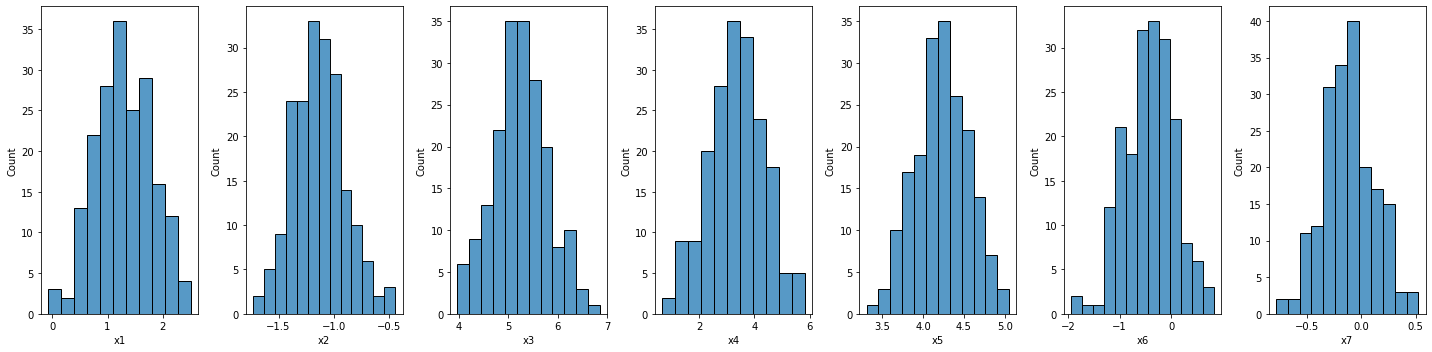

In [6]:
# Plotting histograms
fig, ax = plt.subplots(1, 7, figsize=(20,5))
sns.histplot(train_Df.x1, ax=ax[0])
sns.histplot(train_Df.x2, ax=ax[1])
sns.histplot(train_Df.x3, ax=ax[2])
sns.histplot(train_Df.x4, ax=ax[3])
sns.histplot(train_Df.x5, ax=ax[4])
sns.histplot(train_Df.x6, ax=ax[5])
sns.histplot(train_Df.x7, ax=ax[6])
plt.tight_layout()
plt.show()

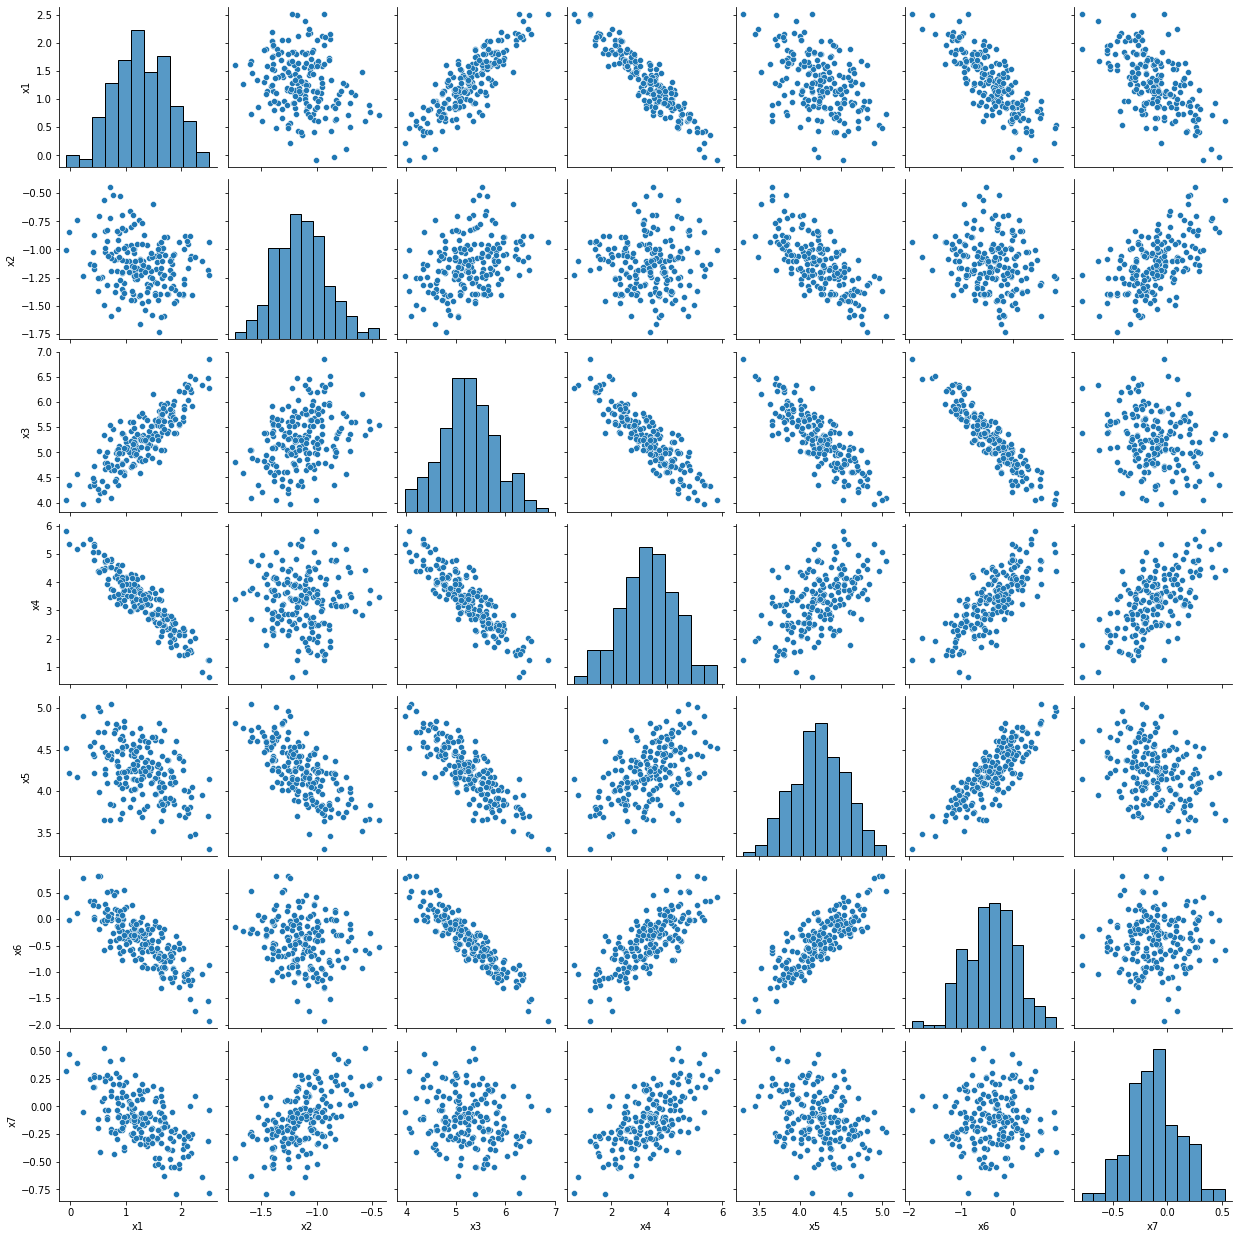

In [7]:
# Scatter plots
sns.pairplot(train_Df)
# to show
plt.show()

In [8]:
# normalizing the features
from sklearn.preprocessing import StandardScaler
df_scale = StandardScaler().fit_transform(train_Df) 
print(df_scale.mean())
print(df_scale.std())

-1.5159135433979582e-16
1.0


## Dimensionality reduction using PCA

Text(0, 0.5, 'cumulative explained variance')

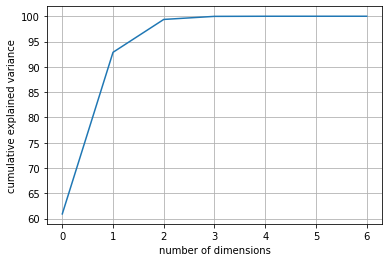

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_scale.data)
cum_var = (np.cumsum(pca.explained_variance_ratio_))*100
plt.plot(cum_var)
plt.grid()
plt.xlabel('number of dimensions')
plt.ylabel('cumulative explained variance')

It can be observed that almost 100 percent variance explained is reached using only 2 pca components and 100 percent is reached using more than 3 components.

# 2 components

In [10]:
from sklearn.decomposition import PCA
pca_transf = PCA(n_components=2)
pca_array =pca_transf.fit_transform(df_scale)
pca_df=pd.DataFrame(pca_array,columns = ['pc1', 'pc2'])
pca_df.head()

,pc1,pc2
0,-1.597024,0.826766
1,-0.044709,-0.326855
2,1.059892,0.742775
3,-3.889508,1.214780
4,1.268405,-0.523475


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


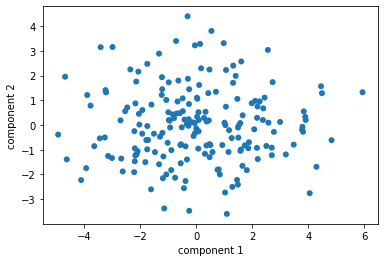

In [13]:
# plot data
sns.scatterplot(pca_array[:, 0], pca_array[:, 1], edgecolor='none', alpha=1.0,
            cmap=plt.cm.get_cmap('Set2', 200))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [14]:
# Datafram to array
arr =  train_Df. to_numpy()

In [15]:
#Reconstructing using Inverse Transform 
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=2)
X_recon2 = ipca.inverse_transform(ipca.fit_transform(df_scale))
# Calculating MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse2 = mean_squared_error(arr,X_recon2)
print(' mse:',mse2)

 mse: 8.864234889742836


# 3 components

In [16]:
from sklearn.decomposition import PCA
pca_transf3 = PCA(n_components=3)
pca_array3 =pca_transf3.fit_transform(df_scale)
pca_df3=pd.DataFrame(pca_array3,columns = ['pc1', 'pc2','pc3'])
pca_df3.head()

,pc1,pc2,pc3
0,-1.597024,0.826766,-0.168860
1,-0.044709,-0.326855,0.059023
2,1.059892,0.742775,-1.100135
3,-3.889508,1.214780,-0.430487
4,1.268405,-0.523475,0.406016


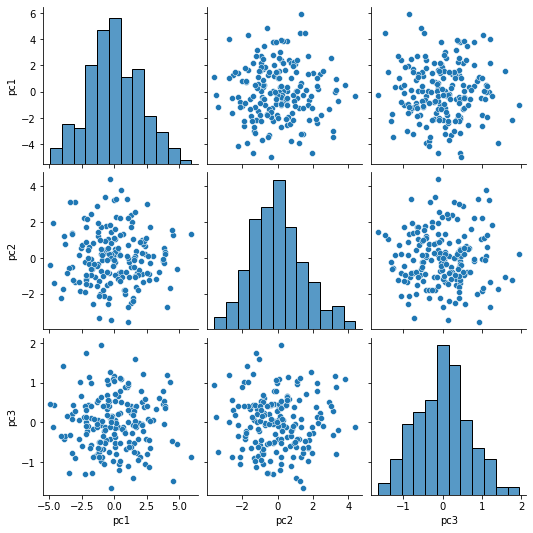

In [17]:
# Scatter plots
sns.pairplot(pca_df3)
# # to show
plt.show()

In [18]:
#Reconstructing using Inverse Transform 
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=3)
X_recon3 = ipca.inverse_transform(ipca.fit_transform(df_scale))
# Calculating MSE
mse3 = mean_squared_error(arr,X_recon3)
print(' mse:',mse3)

 mse: 8.883391087117847


In [19]:
from sklearn.decomposition import PCA
pca_transf4 = PCA(n_components=4)
pca_array4 =pca_transf4.fit_transform(df_scale)
pca_df4=pd.DataFrame(pca_array4,columns = ['pc1', 'pc2','pc3','pc4'])
pca_df4.head()

,pc1,pc2,pc3,pc4
0,-1.597024,0.826766,-0.168860,0.008344
1,-0.044709,-0.326855,0.059023,0.034834
2,1.059892,0.742775,-1.100135,0.098788
3,-3.889508,1.214780,-0.430487,0.229593
4,1.268405,-0.523475,0.406016,-0.131437


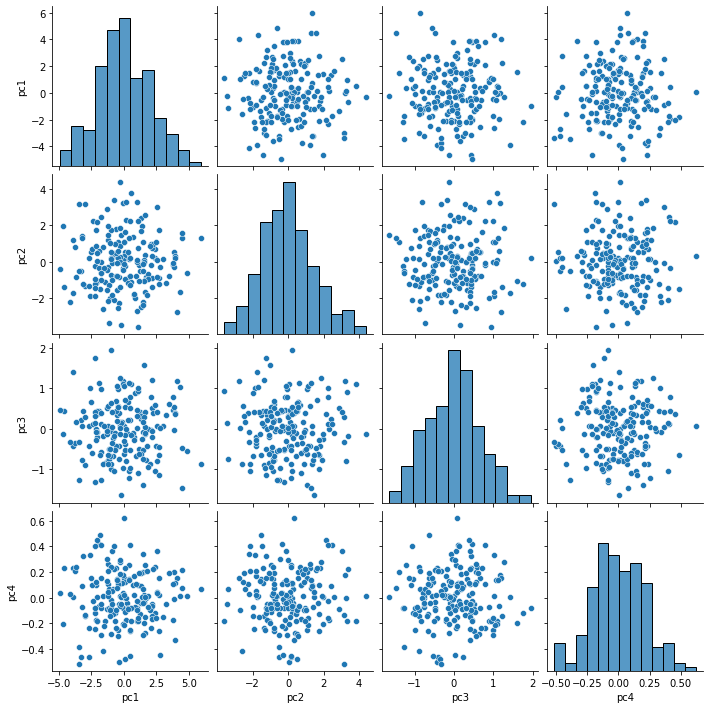

In [20]:
# Scatter plots
sns.pairplot(pca_df4)
# to show
plt.show()

In [21]:
#Reconstructing using Inverse Transform 
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=4)
X_recon4 = ipca.inverse_transform(ipca.fit_transform(df_scale))
# Calculating MSE
mse4 = mean_squared_error(arr,X_recon4)
print(' mse:',mse4)

 mse: 8.882439939273347


## References
https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6

https://hackernoon.com/principal-component-analysis-unsupervised-learning-model-8f18c7683262

https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db

https://www.datacamp.com/tutorial/principal-component-analysis-in-python

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

https://nirpyresearch.com/principal-component-regression-python-revisited/

https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com

https://analyticsindiamag.com/guide-to-image-reconstruction-using-principal-component-analysis/